In [192]:
from keras import losses

y = cv2.imread('/home/rcardiff/ryan/ryan/290320_test/test_frames/img_5_12.png', cv2.IMREAD_GRAYSCALE)
y = cv2.resize(y,(256,256))
y_mask = cv2.imread('/home/rcardiff/ryan/ryan/290320_test/test_masks/img_5_12.png', cv2.IMREAD_GRAYSCALE)

y_mask =  cv2.resize(y_mask, (256, 256)) 
x = y.reshape((1, 256, 256, 1))
y_pred = m.predict(x)

loss = losses.binary_crossentropy(y_mask, y_pred, from_logits=False, label_smoothing=0)


In [ ]:
import matplotlib.pyplot as plt

#ORIGINAL
plt.imshow(y,cmap = plt.cm.gray)
plt.axis('off')
plt.title('frame')

#MASK
plt.figure()
plt.imshow(y_true,cmap = plt.cm.gray)
plt.axis('off')
plt.title('mask')

#PREDICTION
plt.figure()
plt.imshow(y_pred.reshape(256,256),cmap=plt.cm.gray)
plt.title('pred')
plt.axis('off')

#LOSS
plt.figure()
plt.imshow(loss[0], cmap = plt.cm.gray)
plt.title('cross entropy loss')
plt.axis('off')


In [15]:
import numpy as np
import os
import cv2

def testGenerator(img_folder, target_size = (256,256)):
    n = os.listdir(img_folder) #List of training images
    
    while (True):
        img = np.zeros((len(n), target_size[0], target_size[1], 1)).astype('float')
        mask = np.zeros((len(n), target_size[0], target_size[1], 1)).astype('float')
        
        for i in range(len(n)):
            if n[i].endswith('.png'):
                test_img = cv2.imread(img_folder+'/'+n[i], cv2.IMREAD_GRAYSCALE)/255.
                test_img =  cv2.resize(test_img, (target_size)) # Read an image from folder and resize
                test_img = test_img.reshape(target_size[0], target_size[1], 1)
                img[i] = test_img
            
        yield img
        

In [17]:
from keras.models import *

m = load_model('/home/rcardiff/ryan/ryan/290320_test/weights/Model_smaller_partitions.h5')

test_frame_path = '/home/rcardiff/ryan/ryan/290320_test/test_frames/test_1'
test_gen = testGenerator(test_frame_path)

results_1 = m.predict_generator(test_gen,steps = 1,verbose = 1)

test_frame_path = '/home/rcardiff/ryan/ryan/290320_test/test_frames/test_2'
test_gen = testGenerator(test_frame_path)

results_2 = m.predict_generator(test_gen,steps = 1,verbose = 1)


1/1 [==============================] - 4s 4s/step


In [19]:
results = np.concatenate((results_1,results_2))
np.save('/home/rcardiff/ryan/ryan/290320_test/weights/smaller_partitions_results.npy', results)

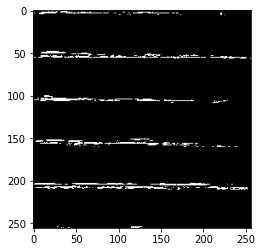

In [25]:
from matplotlib import pyplot as plt

plt.imshow(results[1].reshape((256,256))>.1, cmap = plt.cm.gray)

(-0.5, 255.5, 255.5, -0.5)

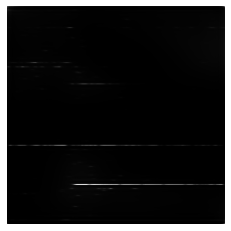

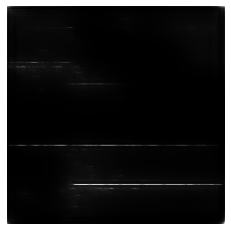

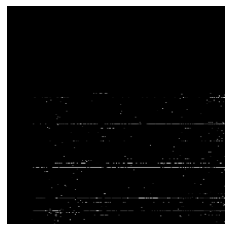

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

results = np.load('/home/rcardiff/ryan/ryan/290320_test/weights/gpu_results.npy')
results_2 = np.load('/home/rcardiff/ryan/ryan/290320_test/weights/bce_results.npy')

arr = results[0].reshape((256,256))
plt.imshow(arr, cmap = plt.cm.gray)
plt.axis('off')
plt.figure()

plt.imshow(results_2[0].reshape((256,256)), cmap = plt.cm.gray)
plt.axis('off')
plt.figure()

mask = cv2.imread('/home/rcardiff/ryan/ryan/290320_test/test_frames/img_0_1.png',cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (256,256))
plt.imshow(mask,cmap=plt.cm.gray)
plt.axis('off')

<Figure size 432x288 with 0 Axes>

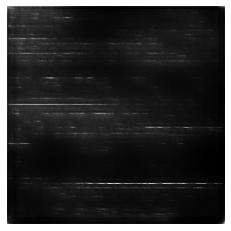

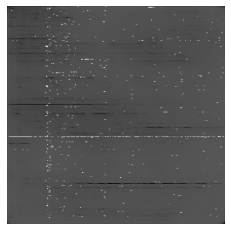

<Figure size 432x288 with 0 Axes>

In [76]:
results_small = np.load('/home/rcardiff/ryan/ryan/290320_test/weights/bce_results.npy')
r = results_small[1].reshape((256,256))

mask = cv2.imread('/home/rcardiff/ryan/ryan/290320_test/test_frames/img_0_19.png',cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (256,256))/255
diff = mask - r

plt.imshow(r, cmap = plt.cm.gray)
plt.axis('off')
plt.figure()

plt.imsh
plt.imshow(diff, cmap = plt.cm.gray)
plt.axis('off')
plt.figure()


0.41084906


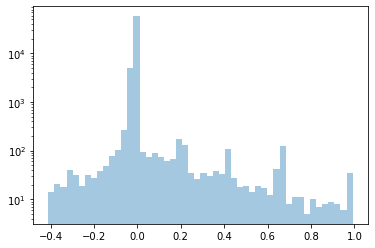

In [75]:
fig, ax = plt.subplots()
plt.yscale('log')
sns.distplot(diff,kde=False)
print(max(map(max,r)))

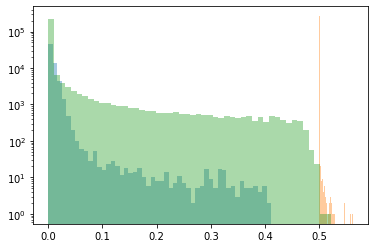

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

results_small = np.load('/home/rcardiff/ryan/ryan/290320_test/weights/bce_results.npy')
results_lrg = np.load('/home/rcardiff/ryan/ryan/290320_test/weights/test_results.npy')
results_mid = np.load('/home/rcardiff/ryan/ryan/290320_test/weights/512_results.npy')
fig, ax = plt.subplots()
plt.yscale('log')
sns.distplot(results_small[0],kde=False,ax = ax)
sns.distplot(results_lrg[0],kde=False,ax=ax)
sns.distplot(results_mid[0],kde=False,ax=ax)

sns.legend()

In [25]:
original = results[0].reshape((256,256))

idx = []
for i in range(len(results)):
    difference = cv2.subtract(original, results[i].reshape((256,256)))
    if difference.all() == 0:
        idx.append(i)


In [4]:
import numpy as np
import os
import cv2

def testGenerator_single(img_path, target_size = (256,256)):
    #n = os.listdir(img_folder) #List of training images
    
    while (True):
        img = np.zeros((1, target_size[0], target_size[1], 1)).astype('float')
        
        if img_path.endswith('.png'):
                test_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)/255.
                test_img =  cv2.resize(test_img, (target_size)) # Read an image from folder and resize
                test_img = test_img.reshape(target_size[0], target_size[1], 1)
                img[0] = test_img

        yield img
        

In [12]:
m = load_model('/home/rcardiff/ryan/ryan/290320_test/weights/Model_smaller_partitions.h5')
x = '/home/rcardiff/ryan/ryan/290320_test/test_frames/img00093.png'
test_gen = testGenerator_single(x)

predict_results = m.predict_generator(test_gen, steps = 1)

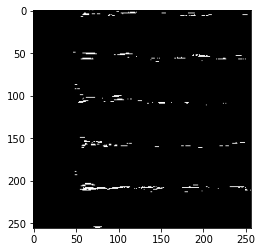

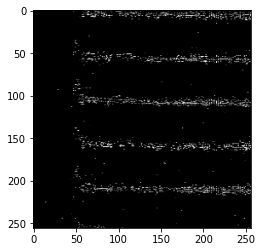

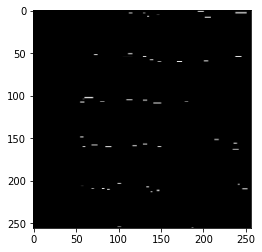

In [14]:
import matplotlib.pyplot as plt

plt.imshow(predict_results[0].reshape((256,256))>.1, cmap = plt.cm.gray)
plt.figure()
frame = cv2.imread('/home/rcardiff/ryan/ryan/290320_test/test_frames/img00093.png',cv2.IMREAD_GRAYSCALE)
frame = cv2.resize(frame, (256,256))
plt.imshow(frame, cmap = plt.cm.gray)

plt.figure()
mask = cv2.imread('/home/rcardiff/ryan/ryan/290320_test/test_masks/img00093.png',cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (256,256))
plt.imshow(mask, cmap = plt.cm.gray)